# Lab 3 Template

**Author:** Alex Feucht

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice Monte Carlo integration methods and implement the Ising model. We'll explore how statistical methods can be used to solve complex physical problems numerically.

## Key Concepts
- Monte Carlo integration -- rejection method
- Statistical sampling and uncertainty
- Ising model and phase transitions
- Metropolis algorithm -- probability condition


## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [1]:
# TODO: Import numpy, matplotlib.pyplot, and any other necessary libraries
# Set numpy random seed for reproducibility

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(27)

# Part I: Sphere in 3D Monte Carlo Integration

We will use Monte Carlo methods to calculate the mass of a sphere with different density distributions. The basic idea is to:
1. Generate random points in a cube that encloses the sphere
2. Check which points fall inside the sphere
3. Use these points to estimate integrals

## Part A: Uniform Density (3 pt)

For a sphere of radius 1 with uniform density ρ = 2.0, calculate the mass using Monte Carlo integration.

**Monte Carlo Integration Theory:**

Monte Carlo integration is a powerful numerical technique that uses random sampling to estimate integrals. For a 3D sphere problem, we:

1. **Enclosing Volume**: Use a cube from [-1,1]³ (volume = 8) that contains the unit sphere
2. **Random Sampling**: Generate N random points uniformly distributed in this cube
3. **Hit-or-Miss**: Check which points fall inside the sphere (x² + y² + z² < 1)
4. **Integration Formula**: Estimate the integral using:
   $$\text{Mass} = V_{cube} \times \frac{1}{N} \sum_{i=1}^{N} \rho(x_i, y_i, z_i) \times I(x_i, y_i, z_i)$$
   where I(x,y,z) = 1 if point is inside sphere, 0 otherwise

**Statistical Uncertainty:**
- Standard error decreases as σ ∝ 1/√N (slow convergence!)
- Uncertainty estimate: σ ≈ np.sqrt(p * (1 - p) / N) * cube_volume * density, where p is fraction of acceptance.
- For uniform distribution in [-1,1]: np.sqrt(p * (1 - p)) = √((1-(-1))²/12) = √(1/3) ≈ 0.577
check if it's true.


In [2]:
# TODO: Step 1 - Generate random points function
# Use np.random.uniform(-1.0, 1.0, N) for each coordinate

N = 100
volCube = 8 #unit cube, given
rho = 2
x = np.random.uniform(-1.0, 1.0, N)
y = np.random.uniform(-1.0, 1.0, N)
z = np.random.uniform(-1.0, 1.0, N)

# TODO: Step 2 - Index function for sphere
# Check condition: x² + y² + z² < 1
# Distance formula in 3D = np.sqrt(x^2+y^2+z^2)<1 for inside volume, <= on surface too

distance = np.sqrt(x**2 + y**2 + z**2) < 1
coordInside = sum(distance)
print(f'Number of coordinate sets inside sphere: {coordInside}')

# TODO: Step 3 - Uniform density function
# Return constant density = 2.0 for all points

uniformDF = rho * coordInside

# TODO: Step 4 - Mass calculation with uncertainty
# Apply Monte Carlo formula: V_cube/N * sum(density * inside)
# Calculate uncertainty: V_cube * 0.577 / sqrt(N)

mass_100 = (volCube/N) * uniformDF
p = coordInside / N # Fraction of points inside the sphere
uncertainty_100 = volCube * np.sqrt(p * (1 - p) / N) * rho
theoretical = 4/3 * np.pi * rho # Theoretical mass for uniform density

# TODO: Test with N=100 and print results

print(f'Mass estimate (N=100): {mass_100:.3f} ± {uncertainty_100:.3f}')
print(f'Theoretical value: {theoretical:.3f}')
print(f'Relative error: {abs(mass_100 - theoretical)/theoretical * 100:.1f}%')

Number of coordinate sets inside sphere: 45
Mass estimate (N=100): 7.200 ± 0.796
Theoretical value: 8.378
Relative error: 14.1%


**Convergence Analysis:**

Study how Monte Carlo estimates improve with more samples (N).

**Key Concepts:**
- Error decreases as 1/√N (slow convergence)

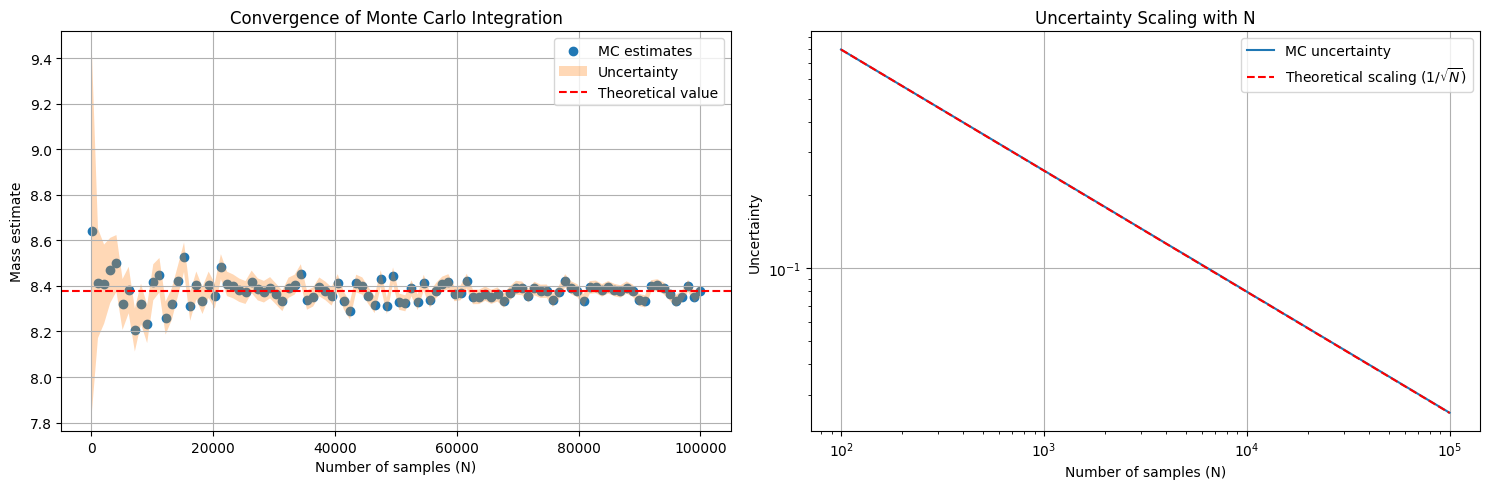


Final results (N=100000):
Mass: 8.3762 ± 0.0253
Relative error: 0.02%


In [3]:
# TODO: Convergence analysis implementation
# Create N_values array from 100 to 100,000

N_values = np.linspace(100, 100000, 100, dtype=int)
masses = []
uncertainties = []

volCube = 8
rho2 = 2
theoretical = 4/3 * np.pi * rho2

# TODO: Loop over N values and collect mass estimates and uncertainties

for N2 in N_values:
  x2 = np.random.uniform(-1.0, 1.0, N2)
  y2 = np.random.uniform(-1.0, 1.0, N2)
  z2 = np.random.uniform(-1.0, 1.0, N2)

  distance2 = np.sqrt(x2**2 + y2**2 + z2**2) < 1
  coordInside2 = sum(distance2)

  uniformDF2 = rho2 * coordInside2
  mass_N = (volCube/N2) * uniformDF2
  p2 = coordInside2 / N2
  uncertainty_N2 = volCube * np.sqrt(p2 * (1 - p2) / N2) * rho2

  masses.append(mass_N)
  uncertainties.append(uncertainty_N2)

# TODO: Create 2 figure with two subplots: convergence plot and uncertainty scaling to 1/√N

masses = np.array(masses)
uncertainties = np.array(uncertainties)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Convergence plot
ax1.scatter(N_values, masses, label='MC estimates')
ax1.fill_between(N_values, masses - uncertainties, masses + uncertainties, alpha=0.3, label='Uncertainty')
ax1.axhline(theoretical, color='r', linestyle='--', label='Theoretical value')
ax1.set_xlabel('Number of samples (N)')
ax1.set_ylabel('Mass estimate')
ax1.set_title('Convergence of Monte Carlo Integration')
ax1.legend()
ax1.grid(True)

# Uncertainty scaling plot
ax2.loglog(N_values, uncertainties, label='MC uncertainty')
theoretical_scaling = uncertainties[0] * np.sqrt(N_values[0] / N_values)
ax2.loglog(N_values, theoretical_scaling, color='r', linestyle='--', label=r'Theoretical scaling ($1/\sqrt{N}$)')
ax2.set_xlabel('Number of samples (N)')
ax2.set_ylabel('Uncertainty')
ax2.set_title('Uncertainty Scaling with N')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# TODO: Print results

final_error = abs(masses[-1] - theoretical) / theoretical * 100
print(f"\nFinal results (N={N_values[-1]}):")
print(f"Mass: {masses[-1]:.4f} ± {uncertainties[-1]:.4f}")
print(f"Relative error: {final_error:.2f}%")

## Part B: Linear Density (3 pt)

**Variable Density:** ρ(r) = ρ₀r where r = √(x² + y² + z²)

**Theory:**
- Density increases with distance from center
- Analytical result: M = πρ₀ = 2π ≈ 6.283
- Same Monte Carlo method, different density function

**Requirements:**
- Implement `linear_density(x, y, z)` function  
- Find N needed for 1% accuracy you can use scaling
- Compare with theoretical value

In [4]:
# TODO: Implement linear density function
# Calculate r = sqrt(x² + y² + z²), then return ρ₀ × r

def linear_density(x, y, z, rho0):
    r = np.sqrt(x**2 + y**2 + z**2)
    return rho0 * r

# Initialize N, density, 3 random uniform distributions of x, y, z
N3 = 100000
rho3 = 2.0
x3 = np.random.uniform(-1.0, 1.0, N3)
y3 = np.random.uniform(-1.0, 1.0, N3)
z3 = np.random.uniform(-1.0, 1.0, N3)

# TODO: Find N for 1% accuracy
# Use scaling relationship: N_new = N_old × (σ_old / σ_target)²

# Calculate initial mass and uncertainty for N3
volCube = 8
theoretical_linear = np.pi * rho3
r3 = np.sqrt(x3**2 + y3**2 + z3**2)
inside_sphere = r3 < 1
mass_N3 = (volCube / N3) * np.sum(linear_density(x3[inside_sphere], y3[inside_sphere], z3[inside_sphere], rho3))

# Using uniform density uncertainty for scaling
p3 = np.sum(inside_sphere) / N3
uncertainty_N3_approx = volCube * np.sqrt(p3 * (1 - p3) / N3) * rho3

# Target uncertainty for 1% accuracy
target_uncertainty = theoretical_linear * 0.01

# Use scaling relationship N_new = N_old * (sigma_old / sigma_target)^2
N_new = N3 * (uncertainty_N3_approx / target_uncertainty)**2

# TODO: Calculate mass with linear density large N
# Compare with theoretical value

print(f"For 1% accuracy:")
print(f"Target uncertainty: {target_uncertainty:.4f}")
print(f"Estimated required N: {N_new:.0f}")

# Recalculate with the estimated N_1_percent
N_large = int(N_new)
x_large = np.random.uniform(-1.0, 1.0, N_large)
y_large = np.random.uniform(-1.0, 1.0, N_large)
z_large = np.random.uniform(-1.0, 1.0, N_large)

r_large = np.sqrt(x_large**2 + y_large**2 + z_large**2)
inside_sphere_large = r_large < 1
mass_large_N = (volCube / N_large) * np.sum(linear_density(x_large[inside_sphere_large], y_large[inside_sphere_large], z_large[inside_sphere_large], rho3))

# For uncertainty with variable density, the variance of the integrand f(x,y,z) = rho(x,y,z) if inside, 0 otherwise
integrand_values = np.where(r_large < 1, linear_density(x_large, y_large, z_large, rho3), 0)
variance_integrand = np.var(integrand_values)
unc_large_N = volCube * np.sqrt(variance_integrand / N_large)
print(f"Verification (N={N_large}): mass = {mass_large_N:.4f} ± {unc_large_N:.4f}")

actual_error = (abs(mass_large_N - theoretical_linear) / theoretical_linear) * 100
print(f"Actual error: {actual_error:.2f}%")

For 1% accuracy:
Target uncertainty: 0.0628
Estimated required N: 16169
Verification (N=16169): mass = 6.2543 ± 0.0504
Actual error: 0.46%


## Bonus 1: Exponential Density (1 pt)

Consider a density that is an unit exponential function of the radius according to $$\rho(r)=1/\rho_0 e^{-\rho_0 r}$$

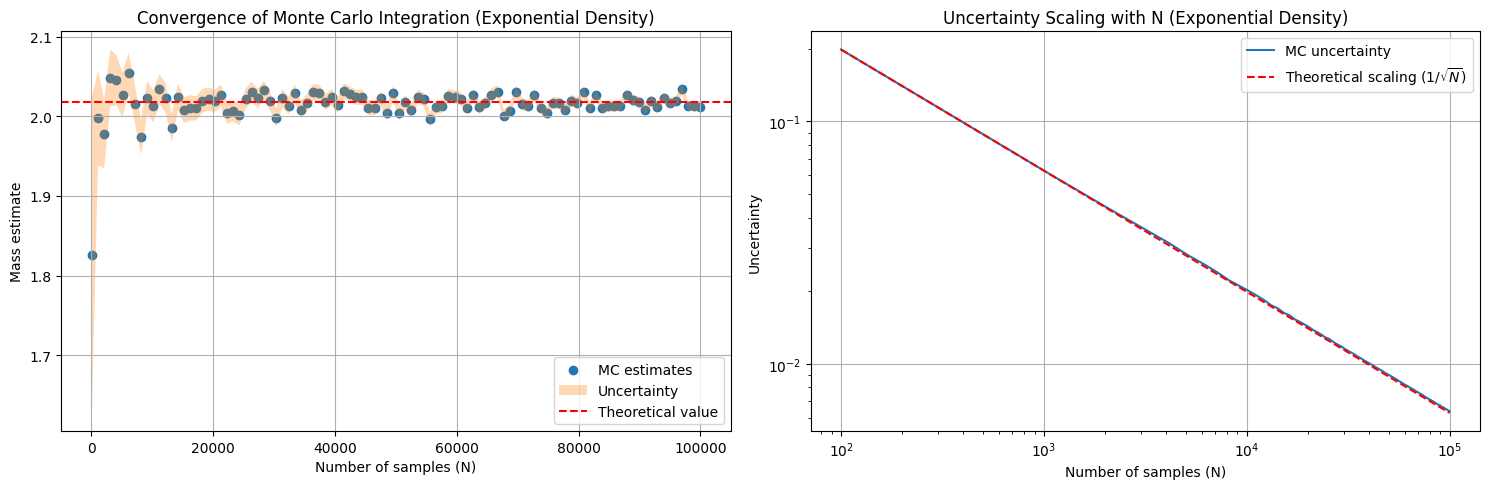


Final results (N=100000):
Mass: 2.0123 ± 0.0064
Theoretical value: 2.0182
Relative error: 0.29%


In [5]:
# TODO: Implement exponential_density(x, y, z, rho0=1.0) returning exp(-rho0*r)/rho0

def exponential_density(x, y, z, rho0=1.0):
    r = np.sqrt(x**2 + y**2 + z**2)
    return (1 / rho0 ) * (np.exp(-rho0 * r))

# TODO: Calculate mass_exp and unc_exp using monte_carlo_integration with N

N_exp_values = np.linspace(100, 100000, 100, dtype=int)
masses_exp = []
uncertainties_exp = []
volCube = 8
# Using rho0 = 1.0 as suggested in the function definition
rho0_exp = 1.0

# Calculated theoretical mass from integrating exponential density function, over volume of a sphere, 4/3 * pi * r^3,
# over interval [0,1], as a function of x, y, z. Rho varies with radius from center
theoretical_exp = 4 * np.pi * (2 / rho0_exp**4 - np.exp(-rho0_exp) * (1 / rho0_exp**2 + 2 / rho0_exp**3 + 2 / rho0_exp**4))

for N_exp in N_exp_values:
  x_exp = np.random.uniform(-1.0, 1.0, N_exp)
  y_exp = np.random.uniform(-1.0, 1.0, N_exp)
  z_exp = np.random.uniform(-1.0, 1.0, N_exp)

  r_exp = np.sqrt(x_exp**2 + y_exp**2 + z_exp**2)
  inside_sphere_mask_exp = r_exp < 1

  # Calculate the integrand values: density if inside the sphere, 0 otherwise
  integrand_values_exp = np.where(inside_sphere_mask_exp, exponential_density(x_exp, y_exp, z_exp, rho0_exp), 0)

  mass_N_exp = (volCube / N_exp) * np.sum(integrand_values_exp)

  # Calculate uncertainty using the variance of the integrand
  variance_integrand_exp = np.var(integrand_values_exp)
  uncertainty_N_exp = volCube * np.sqrt(variance_integrand_exp / N_exp)

  masses_exp.append(mass_N_exp)
  uncertainties_exp.append(uncertainty_N_exp)

masses_exp = np.array(masses_exp)
uncertainties_exp = np.array(uncertainties_exp)

# TODO: Create convergence comparison plot vs N,  set theoretical value for comparison

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Convergence plot
ax1.scatter(N_exp_values, masses_exp, label='MC estimates')
ax1.fill_between(N_exp_values, masses_exp - uncertainties_exp, masses_exp + uncertainties_exp, alpha=0.3, label='Uncertainty')
ax1.axhline(theoretical_exp, color='r', linestyle='--', label='Theoretical value')
ax1.set_xlabel('Number of samples (N)')
ax1.set_ylabel('Mass estimate')
ax1.set_title('Convergence of Monte Carlo Integration (Exponential Density)')
ax1.legend()
ax1.grid(True)

# Uncertainty scaling plot
ax2.loglog(N_exp_values, uncertainties_exp, label='MC uncertainty')
theoretical_scaling_exp = uncertainties_exp[0] * np.sqrt(N_exp_values[0] / N_exp_values)
ax2.loglog(N_exp_values, theoretical_scaling_exp, color='r', linestyle='--', label=r'Theoretical scaling ($1/\sqrt{N}$)')
ax2.set_xlabel('Number of samples (N)')
ax2.set_ylabel('Uncertainty')
ax2.set_title('Uncertainty Scaling with N (Exponential Density)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal results (N={N_exp_values[-1]}):")
print(f"Mass: {masses_exp[-1]:.4f} ± {uncertainties_exp[-1]:.4f}")
print(f"Theoretical value: {theoretical_exp:.4f}")
final_error_exp = abs(masses_exp[-1] - theoretical_exp) / theoretical_exp * 100
print(f"Relative error: {final_error_exp:.2f}%")

# Part II: Ising Model (4 pt)

**Statistical Mechanics Background:**

The **Ising model** is a mathematical model of ferromagnetism in statistical mechanics. It describes a system of discrete spins that can be in one of two states (+1 or -1) arranged on a lattice.

**Physical Motivation:**
- Models magnetic materials like iron
- Each lattice site represents an atomic magnetic moment
- Spins prefer to align with neighbors (ferromagnetic coupling)
- Temperature creates thermal fluctuations that oppose ordering
- Results in **phase transition** between ordered and disordered states

**Energy Function:**
$$H(S)=-\frac{J}{2}\sum_{i,j} s_{i,j} (s_{i+1,j}+s_{i-1,j}+s_{i,j+1}+s_{i,j-1})$$

Where:
- **J > 0**: Ferromagnetic coupling (favors parallel spins)
- **⟨i,j⟩**: Sum over nearest neighbors only
- **s_i ∈ {-1, +1}**: Spin values

Without loss of generizability, we choose a parameterization that $J=1$ and $k_B=1$.

**Key Physics:**
- **Low T**: Thermal energy << J → spins align → ordered (ferromagnetic) phase
- **High T**: Thermal energy >> J → spins random → disordered (paramagnetic) phase  
- **Critical temperature T_c**: Phase transition occurs
- **2D Ising exact result**: T_c = 2J/ln(1+√2) ≈ 2.269 (for J=1)

**Metropolis Algorithm:**
Uses Monte Carlo sampling to generate configurations according to Boltzmann distribution:
P(configuration) ∝ $e^{-\Delta E/T}$, with $T=1.5$.

**Algorithm Steps:**
1. Choose random spin
2. Calculate energy change ΔE if flipped  
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat many times to reach equilibrium


## Step 1: Initialize Lattice

**Lattice Setup:**
- 10×10 lattice with periodic boundaries (edges wrap around)
- Initial state: all spins = +1
- Each spin has exactly 4 neighbors

In [6]:
# TODO: Initialize 10x10 lattice with all spins = +1
# Use np.ones((L, L), dtype=int) for integer spins

T = 1.5
J = 1
Kb = 1

L = 10
lattice = np.ones((L, L), dtype=int)

# TODO: Test lattice creation and print shape and initial magnetization

print(f"Shape of the lattice: {lattice.shape}")
print(f"Initial magnetization: {np.sum(lattice)}")
print(lattice)

Shape of the lattice: (10, 10)
Initial magnetization: 100
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


## Step 2: Energy Calculation

**Energy Function:** E = -J Σ s_i s_j (sum over nearest neighbors)

**Key Points:**
- Parallel spins (+1,+1 or -1,-1): contribute -J (lower energy)
- Antiparallel spins (+1,-1): contribute +J (higher energy)  
- Use periodic boundaries: neighbors wrap around edges
- Avoid double-counting pairs

**Test if your energy function is correct:**

for a Test lattice (3x3):

[[1 1 1]
 [1 1 1]
 [1 1 1]]

Total energy: -18.0

In [7]:
# TODO: Calculate total energy from 4 neighbor coordinates (avoid double counting!)
# Count each pair once: only right and down neighbors

def energy(lattice):
    energy = 0
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            # Interaction with right neighbor (i, j+1)
            energy -= J * lattice[i, j] * lattice[i, (j + 1) % L]
            # Interaction with down neighbor (i+1, j)
            energy -= J * lattice[i, j] * lattice[(i + 1) % L, j]
    return energy

# TODO: Energy change if spin (i,j) flips
# ΔE = -2 × local_energy (since spin changes sign)

def delta_energy(lattice, i, j):
    L = lattice.shape[0]
    spin = lattice[i, j]
    neighbors_sum = lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] + lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
    delE = 2 * J * spin * neighbors_sum
    return delE

# TODO: Test your energy function with small lattice and print results

test_lattice = np.ones((3, 3), dtype=int)
expected_energy = -18.0
calculated_energy = energy(test_lattice)
test_delta = delta_energy(test_lattice, 1, 1)

print(f"Test lattice (3x3):\n{test_lattice}")
print(f"Expected energy: {expected_energy}")
print(f"Calculated energy: {calculated_energy}")
print(f"Energy change if spin (1,1) flips: {test_delta}")

Test lattice (3x3):
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Expected energy: -18.0
Calculated energy: -18
Energy change if spin (1,1) flips: 8


## Step 3: Metropolis Algorithm: Magnetization vs. N

Calculate the magnitization $$<M>=\frac{1}{N} \sum_{i,j\in\Lambda} s_{i,j}$$ as function of MC steps $N$. Plot $<M>$ as function of $N$ where $N$ starts from 0 to 10000 with step size $\Delta N=100$. Does the magnitization converge to an equillibrium value?

**Algorithm:**
1. Choose random spin
2. Calculate energy change ΔE if flipped
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat for N times

**Important Grading requirement:**
> **💡 Note:** This MC algorithm is partially given, but you need to explain what each line stands for.


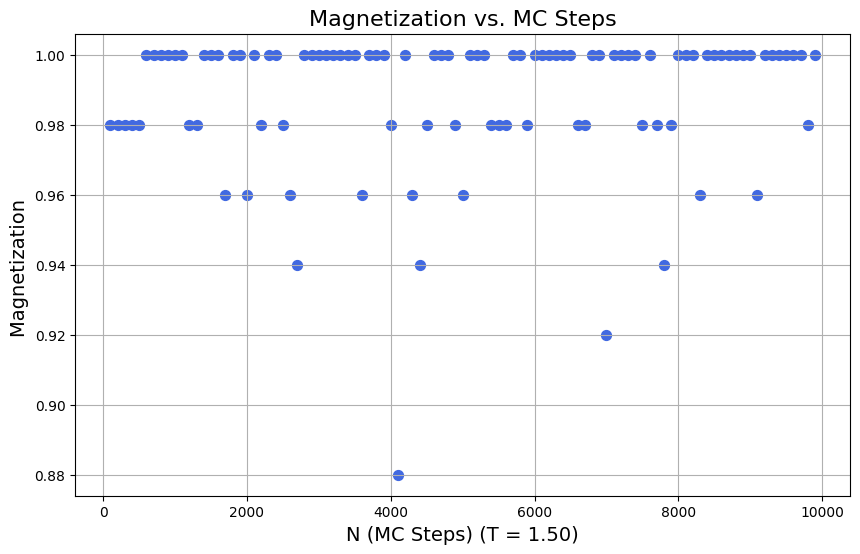


Final magnetization after 10000 steps: 1.0000


In [8]:
# TODO: Implement Metropolis algorithm

# TODO: Monte Carlo sweep (L² attempts) using Metropolis algorithm
# Perform L² individual spin flip attempts, return updated configuration

def MCmove(config, T):
    L = config.shape[0]
    for i in range(L):
        for j in range(L):
                # Choose a random spin
                a = np.random.randint(0, L)
                b = np.random.randint(0, L)
                spin = config[a, b]
                # Calculate the sum of its 4 neighbors using periodic boundary conditions
                neighbors = config[(a+1)%L,b] + config[(a-1)%L,b] + config[a,(b+1)%L] + config[a,(b-1)%L]
                # Calculate the energy change if the spin is flipped
                # delE = -J * (-spin * neighbors) - (-J * spin * neighbors) = 2 * J * spin * neighbors
                # Since we are using J=1, delE = 2 * spin * neighbors
                delE = 2 * J * spin * neighbors
                # Metropolis acceptance condition
                if delE < 0:
                    # Accept the flip if energy decreases
                    spin *= -1
                # Accept the flip with probability exp(-delE/T) if energy increases
                elif np.random.rand() < np.exp(-delE/(Kb * T)):
                    spin *= -1
                # Update the spin in the configuration
                config[a, b] = spin
    return config

# TODO: Full simulation with observable measurement
# Run multiple sweeps (MC steps), sample magnetization and energy every few sweeps

# Parameters for the simulation
N_steps = 10000 # Total number of Monte Carlo steps
delta_N = 100 # Step size for recording magnetization
N_equilibration = 100 # Number of steps to reach equilibrium (can be adjusted)

# Initialize the lattice
L = 10
lattice = np.ones((L, L), dtype=int) # Start with all spins up

# Lists to store results
Steps = [] # Step indices
M_values = [] # Magnetization values of steps

# Run the simulation
for step in range(N_steps):
    MCmove(lattice, T) # Perform one Monte Carlo sweep

    # Record magnetization every delta_N steps after equilibration
    if step >= N_equilibration and (step - N_equilibration) % delta_N == 0:
        magnetization = np.sum(lattice) / (L*L)
        Steps.append(step)
        M_values.append(magnetization)

# TODO:Plot average Magnetization as function of N (number of MC steps)

plt.figure(figsize=(10, 6))
plt.scatter(Steps, M_values, s=50, marker='o', color='RoyalBlue')
plt.xlabel(f'N (MC Steps) (T = {T:.2f})', fontsize=14);
plt.ylabel("Magnetization ", fontsize=14);
plt.title("Magnetization vs. MC Steps", fontsize=16)
plt.grid(True)
plt.show()

# TODO: Print results (optional, can print the final magnetization)
print(f"\nFinal magnetization after {N_steps} steps: {M_values[-1]:.4f}")

## Bonus 2: Temperature Study (4 pt)

**Goal:** Observe ferromagnetic phase transition in physics observables around T_critical= 2.0 / np.log(1 + np.sqrt(2))


**Method:**
- Study temperatures $T$ from 1.5 to 3.25 with 10 steps.
- For each T: equilibrate with 10000 MC sampling → measure → record averages
- Plot Magnetization, Energy, Susceptibility, Heat capacity vs. temperature

**Expected:**
- Low T: high |m|, low energy (ordered)
- High T: low |m|, high energy (disordered)
- Transition around T_c = 2.269

**Observable Quantities:**
- **Magnetization**: $\langle m \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} M_i$ (order parameter) - measures degree of spin alignment
- **Energy**: $\langle e \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} E_i$ (average energy per spin) - indicates thermal state of the system
- **Susceptibility**: $\chi = \frac{1}{k_B T}(\langle M^2 \rangle - \langle M \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i\right)^2\right)$ - measures response to external magnetic field, peaks at phase transition
- **Heat capacity**: $C = \frac{1}{k_B T}(\langle E^2 \rangle - \langle E \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i\right)^2\right)$ - quantifies energy fluctuations, shows anomaly at critical temperature

*Note that we have chosen $k_B=1$ for this exercise*

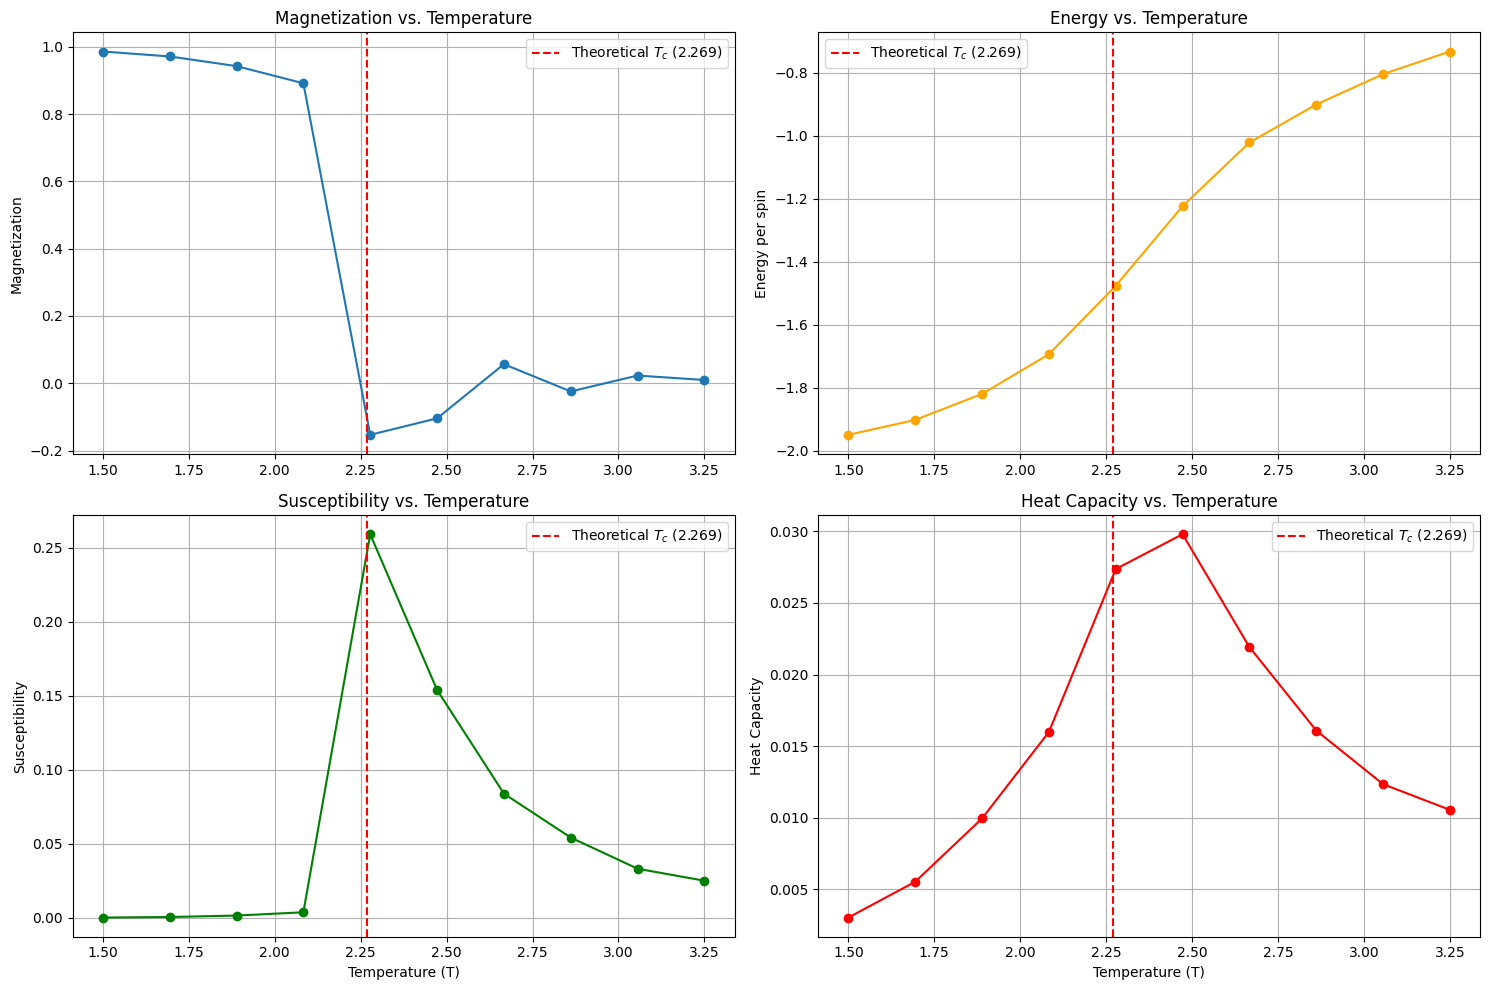

Empirical T_c from Susceptibility peak: 2.278
Empirical T_c from Heat Capacity peak: 2.472
Theoretical T_c: 2.269
Relative difference (using susceptibility peak): 0.4%


In [10]:
# TODO: Scan temperatures from 1.5 to 3.25 with 10 steps
# Loop over temperatures: equilibrate, measure, record averages

# Storage for values from the results of the main for loop
T_values = []
M_values = []
E_values = []
chi_values = []
C_values = []
T_critical = 2.0 / np.log(1 + np.sqrt(2))

# Main for loop for each temperature step, 10 steps from T=1.5 to T=3.25
for T in np.linspace(1.5, 3.25, 10):

    # Equilibration

    # Re-initialize lattice for each temperature
    lattice = np.ones((L, L), dtype=int)
    # Using N_equilibration for equilibration steps, can be changed above for faster or slower equilibrium rate
    for i in range(N_equilibration):
        MCmove(lattice, T) # Perform MC Sweep from above to populate lattice beyond equilibrium point

    # Measurement stage, initialize values to store sums
    M_sum = 0
    E_sum = 0
    M2_sum = 0
    E2_sum = 0
    N_measurements = N_steps - N_equilibration # Number of steps for measurement

    # After equilibration, perform measurement steps
    for i in range(N_measurements):
        MCmove(lattice, T) # Perform MC Sweep at Temp step for measurements after equilibration
        magnetization = np.sum(lattice) / (L*L) # Sums magnetization per MC sweep
        energy_val = energy(lattice) / (L*L) # Calculate energy per spin

        # Add to init. sum each total magnetization and energy and their squares per sweep
        M_sum += magnetization
        E_sum += energy_val
        M2_sum += magnetization**2
        E2_sum += energy_val**2

    # Calculate averages over number of measurement steps after equilibration
    M_avg = M_sum / N_measurements
    E_avg = E_sum / N_measurements
    M2_avg = M2_sum / N_measurements
    E2_avg = E2_sum / N_measurements

    # Calculate susceptibility and heat capacity
    chi = (M2_avg - M_avg**2) / (Kb * T) # Susceptibility formula
    C = (E2_avg - E_avg**2) / (Kb * T) # Heat capacity formula

    # Populates the values to their lists after each set of MC sweeps/Temp step
    T_values.append(T)
    M_values.append(M_avg)
    E_values.append(E_avg)
    chi_values.append(chi)
    C_values.append(C)

# TODO: Create 4 plots: magnetization vs T, energy vs T, Susceptibility vs T, Specifc Heat vs T

# Also add vertical line at theoretical T_c to each plot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for T vs. Magnetization
axs[0, 0].plot(T_values, M_values, marker='o')
axs[0, 0].axvline(x=T_critical, color='r', linestyle='--', label=f'Theoretical $T_c$ ({T_critical:.3f})')
axs[0, 0].set_ylabel('Magnetization')
axs[0, 0].set_title('Magnetization vs. Temperature')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for T vs. Energy
axs[0, 1].plot(T_values, E_values, marker='o', color='orange')
axs[0, 1].axvline(x=T_critical, color='r', linestyle='--', label=f'Theoretical $T_c$ ({T_critical:.3f})')
axs[0, 1].set_ylabel('Energy per spin')
axs[0, 1].set_title('Energy vs. Temperature')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for T vs. Susceptibility
axs[1, 0].plot(T_values, chi_values, marker='o', color='green')
axs[1, 0].axvline(x=T_critical, color='r', linestyle='--', label=f'Theoretical $T_c$ ({T_critical:.3f})')
axs[1, 0].set_xlabel('Temperature (T)')
axs[1, 0].set_ylabel('Susceptibility')
axs[1, 0].set_title('Susceptibility vs. Temperature')
axs[1, 0].legend()
axs[1, 0].grid(True)

# plot for T vs. Specific Heat
axs[1, 1].plot(T_values, C_values, marker='o', color='red')
axs[1, 1].axvline(x=T_critical, color='r', linestyle='--', label=f'Theoretical $T_c$ ({T_critical:.3f})')
axs[1, 1].set_xlabel('Temperature (T)')
axs[1, 1].set_ylabel('Heat Capacity')
axs[1, 1].set_title('Heat Capacity vs. Temperature')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# TODO: Print relative difference between empirical and theoretical T_c
T_empirical_chi = T_values[np.argmax(chi_values)]
T_empirical_C = T_values[np.argmax(C_values)]

print(f"Empirical T_c from Susceptibility peak: {T_empirical_chi:.3f}")
print(f"Empirical T_c from Heat Capacity peak: {T_empirical_C:.3f}")
print(f"Theoretical T_c: {T_critical:.3f}")

# Calculate relative difference using one of the empirical T_c values (e.g., from susceptibility)
if T_empirical_chi > 0: # Avoid division by zero if no peak is found
   relative_difference = abs(T_empirical_chi - T_critical) / T_critical * 100
   print(f"Relative difference (using susceptibility peak): {relative_difference:.1f}%")

# Discussion

**Answer the following questions based on your results:**

## Part I: MC Integration

1. What was your theoretical mass for uniform density and linear density (and exponential density if you did bonus)?
2. How fast did MC integration converge to $1\%$ error for each density distribution?
2. Does the uncertainty scale as expected?

## Part II: Ising Model  
1. What critical temperature did you observe? Compare your T_c with theoretical value (2.269).

## Submission Instructions

> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
>
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab3_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
>
> Make sure all cells have been executed and all outputs are visible before downloading!

# **Answer to Discussion Questions**
# Part 1
1. Theoretical Mass of Sphere for different densities:

Uniform: 4/3 * pi * rho

Linear: pi * rho

Exponential: 4 * pi * (2 / rho^4 - exp(-rho) * (1 / rho^2 + 2 / rho^3 + 2 / rho^4))

2. ~7000 for Uniform (visually looking off graph), ~16150 for Linear (varies, but most trials were around 16150 give or take), ~400 for Exponential (visually looking at graph again).
3. Yes, the uncertainty matches almost exactly, to the point where it's difficult to see the two lines apart from the overlap without one of them being dashed and colors being different.
# Part 2
1. T_c = 2.278 from Susceptibility plot, T_c = 2.472 from Heat Capacity plot, Susceptibility differed from Theoretical Critical Temperature of 2.269 by only ~0.4%